# Name : OM CHIRAGBHAI CHOKSI
### SAMATRIX INTERNSHIP TASK NUMBER FINANCE DOMAIN 1

In the stock market, investors build a portfolio by purchasing various stocks and assigning specific weightages to each based on their investment strategy. Using historical price data, we perform a detailed analysis of the portfolio to calculate key financial risk metrics such as Value at Risk (VaR) and Maximum Drawdown (MDD).

Additionally, hypothesis testing and other statistical methods are applied to evaluate the performance and risk associated with the portfolio, helping in data-driven decision-making.

in this project we taking Five Stocks

 TSLA , AAPL , GOOGL , MSFT , AMZN

In [1]:
!pip install pandas_datareader


### import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import time
import seaborn as sns
from pandas_datareader import data as pdr
import datetime as dt
from scipy import stats

### Download data

In [7]:
ticker = ['AAPL','MSFT','GOOGL','AMZN','TSLA']
weights = np.array([0.20,0.20,0.20,0.20,0.20])

start = dt.datetime(2020,1,1)
end = dt.datetime.today()

price = pd.DataFrame(index=pd.date_range(start,end))
price

""
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05
...
2025-06-05
2025-06-06
2025-06-07
2025-06-08


In [9]:
for t in ticker:
  print(f"fetching{ticker}",end = "")
  try:
    ## featching the data
    df = yf.Ticker(ticker).history(start=start.strftime("%Y-%m-%d"),end = end.strftime("%Y-%m-%d"),auto_adjust=True,)
    series = df['Close']
    print("Y finance ",end="")
  except Exception as e:
    print(f"X yfinance ({e}); falling back to Stooq")
    df2 = pdr.DataReader(ticker,'stooq',start,end)
    df2 = df2.sort_index()
    series= df2['Close']

  price[ticker] = series
  time.sleep(1)

price = price.dropna(how='all').ffill().bfill()
print(price.tail())

fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
              AAPL    MSFT   GOOGL    AMZN    TSLA
2025-06-02  201.70  461.97  169.03  206.65  342.69
2025-06-03  203.27  462.97  166.18  205.71  344.27
2025-06-04  202.82  463.87  168.05  207.23  332.05
2025-06-05  200.63  467.68  168.21  207.91  284.70
2025-06-06  203.92  470.38  173.68  213.57  295.14


### Compute Log Return

In [10]:
#log-return = ln(P_t / P_{t-1})
logR = np.log(price / price.shift(1)).dropna()
logR.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA
2020-01-03,-0.009737,-0.012360,-0.005243,-0.012213,0.029203
2020-01-06,0.007879,0.002580,0.026304,0.014776,0.019073
2020-01-07,-0.004666,-0.009299,-0.001935,0.002089,0.038067
2020-01-08,0.015943,0.016008,0.007094,-0.007839,0.048030
2020-01-09,0.021054,0.012240,0.010441,0.004788,-0.022189


### Exmaple series for visual check bell shaped curved FOR TSLA


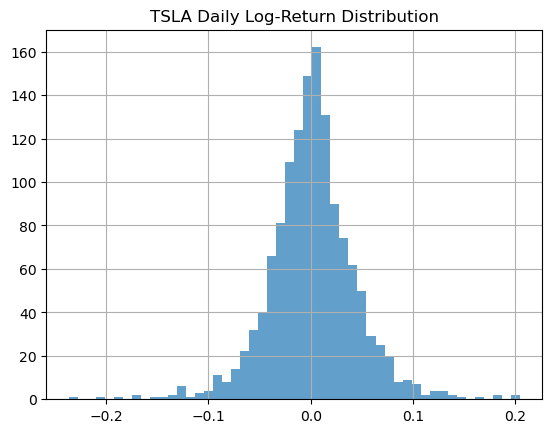

In [13]:
logR['TSLA'].hist(bins=50, alpha=0.7)
plt.title('TSLA Daily Log-Return Distribution')
plt.show()

### key understanding

Mean: average daily return

Variance: how much returns vary

Skewness: asymmetry (positive skew → fat right tail)

Kurtosis: tail-heaviness (high kurtosis → more extreme days)

In [15]:
summary = pd.DataFrame({
    'Mean':    logR.mean(),
    'Variance':logR.var(),
    'Skewness':logR.skew(),
    'Kurtosis':logR.kurtosis()
})
summary

,Mean,Variance,Skewness,Kurtosis
AAPL,0.000756,0.000423,0.018596,6.234688
MSFT,0.000820,0.000370,-0.166755,7.476908
GOOGL,0.000685,0.000430,-0.225156,3.633234
AMZN,0.000595,0.000521,-0.071898,4.183234
TSLA,0.001709,0.001838,-0.080443,3.251715


Mean (≈0.05–0.08%): On average each stock’s daily return was very small—about a few‐tenths of a percent gain per day.**bold text**

Variance (≈0.0004): Typical daily swings are around √0.0004 ≃ 2%, so most days see moves of a couple percent.

Skewness (near zero or slightly negative): Returns are roughly symmetric, with a small tendency toward bigger down‐moves than up‐moves.

Kurtosis (>3): All four have “fat tails,” meaning they experience more extreme one‐day jumps or crashes than a normal bell curve would predict.

### Standard Deviation and 95 % C.F. via Chi-square:

In [17]:
## calculate U and std deviation
mu_norm, sigma_norm = logR.stack().mean(), logR.stack().std(ddof=1)
# 95% CI for mean under Normal: μ ± z*·σ/√N
N = logR.size
z95 = stats.norm.ppf(0.975)
ci_mu_norm = (mu_norm - z95*sigma_norm/np.sqrt(N),
              mu_norm + z95*sigma_norm/np.sqrt(N))


# 95% CI for σ via Chi-square:
df = N-1
chi2_low, chi2_high = stats.chi2.ppf([0.025,0.975], df)
ci_sigma_norm = (sigma_norm*np.sqrt(df/chi2_high),
                 sigma_norm*np.sqrt(df/chi2_low))

print("Normal fit:")
print(f"  μ = {mu_norm:.5f}, 95% CI {ci_mu_norm}")
print(f"  σ = {sigma_norm:.5f}, 95% CI {ci_sigma_norm}")

Normal fit:
  μ = 0.00091, 95% CI (0.0002779716885500425, 0.0015482684620242385)
  σ = 0.02676, 95% CI (0.026320368397528392, 0.02721890489931302)


### Student's T test
Fit t-distribution to the pooled returns

returns_flat = all asset returns concatenated

In [19]:
returns_flat = logR.stack().values
df_t, mu_t, sigma_t = stats.t.fit(returns_flat)
print(df_t,mu_t,sigma_t)

2.746316343158822 0.0010983562465740886 0.015891045150828405


In [ ]:
B = 1000
estimates = np.array([stats.t.fit(np.random.choice(returns_flat, size=N, replace=True))
                      for _ in range(B)])
ci_mu_t    = np.percentile(estimates[:,1], [2.5,97.5])
ci_sigma_t = np.percentile(estimates[:,2], [2.5,97.5])
print("\nStudent’s t fit:")
print(f"  df = {df_t:.1f}, μ = {mu_t:.5f},  σ = {sigma_t:.5f}")
print(f"  95% CI for μ (bootstrap): {ci_mu_t}")
print(f"  95% CI for σ (bootstrap): {ci_sigma_t}")

### VAR With Normal dist

In [ ]:
portR= logR.dot(weights)
portR

In [ ]:
μ_p = portR.mean()
σ_p = portR.std(ddof=1)
μ_p,σ_p

In [ ]:
#Zscore (0.05)
z05= stats.norm.ppf(0.05)

# VAR with 95%
VAR_norm= -(μ_p + σ_p *z05)

In [ ]:
print(VAR_norm)

### VAR Using Student-t distribution



In [ ]:
t05 = stats.t.ppf(0.05,df_t)
VaR_t = -(mu_t + sigma_t *t05) *1
VaR_t

### Historical Method VAR Calc

In [ ]:
hist_var = -np.percentile(portR,5)
hist_var

In [ ]:

print("1-Day 95% VaR:")
print(f"  Parametric (Normal):       {VAR_norm:.5f}")
print(f"  Parametric (Student’s t):  {VaR_t:.5f}")
print(f"  Historical (5th percentile): {hist_var:.5f}")

### We found that on most days portfolio won't lost more then 3.2 to 3.78 %

### Hypothesis Test

In [ ]:
t_stat, p_val = stats.ttest_1samp(portR, 0.0)

In [ ]:
print("One-sample t-test on portfolio daily returns:")
print(f"  t-statistic = {t_stat:.3f},  p-value = {p_val:.3f}")

In [ ]:
if p_val < 0.05:
    print("  → Reject H0: mean return is significantly different from zero.")
else:
    print("  → Fail to reject H0: no evidence mean return ≠ 0.")

### Correlation Matrix

In [ ]:
# a) Correlation heatmap
corr = logR.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Asset Return Correlations')
plt.show()


In [ ]:
# b) Diversification benefit
σ_i = logR.std()                         # individual volatilities
σ_weighted = np.dot(weights, σ_i)        # naive weighted avg
σ_portfolio = σ_p                        # from earlier
print(f"Weighted avg σ: {σ_weighted:.4f}")
print(f"Actual portfolio σ: {σ_portfolio:.4f}")
print(f"Diversification benefit: {σ_weighted-σ_portfolio:.4f}")

### Max Draw-down / Draw Down

In [ ]:
# Max Drawdown
cum_ret = (price / price.iloc[0]).prod(axis=1)  # cumulative portfolio growth?
# Actually for portfolio: cum_port = (portR + 1).cumprod()
cum_port = (portR + 1).cumprod()
cum_port

In [24]:
#Track the highest value reached so far
rolling_max = cum_port.cummax()
rolling_max


2020-01-03    0.997930
2020-01-06    1.012023
2020-01-07    1.016932
2020-01-08    1.033048
2020-01-09    1.038489
                ...   
2025-05-16    3.210473
2025-05-19    3.210473
2025-05-20    3.210473
2025-05-21    3.210473
2025-05-22    3.210473
Length: 1354, dtype: float64

In [25]:
drawdown   = (cum_port - rolling_max) / rolling_max
max_dd = drawdown.min()
end_date = drawdown.idxmin()
start_date = cum_port[:end_date].idxmax()

In [26]:
print(f"Max Drawdown: {max_dd:.2%}")
print(f"From {start_date.date()} to {end_date.date()}")

Max Drawdown: -52.07%
From 2022-01-03 to 2023-01-05


### PLOT WISE VISULIZATION OF DRAWDOWN


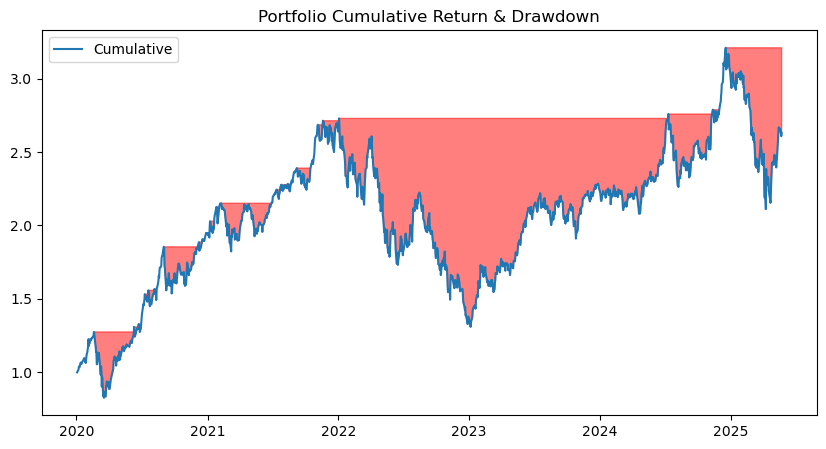

In [27]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(cum_port, label='Cumulative')
plt.fill_between(drawdown.index, cum_port, rolling_max,
                 where=drawdown<0, color='red', alpha=0.5)
plt.title('Portfolio Cumulative Return & Drawdown')
plt.legend()
plt.show()

### Expected shortfall / CVAR

In [28]:
alpha = 0.5 ##  ES at beyond 95%
# historical
ES_historical = portR[portR <= np.percentile(portR, 5)].mean()

# normal method
ES_norm = (μ_p - σ_p * stats.norm.pdf(z05) / alpha)

print(f"Historical ES (95%): {ES_historical:.5f}")
print(f"Parametric Normal ES (95%): {ES_norm:.5f}")

Historical ES (95%): -0.04804
Parametric Normal ES (95%): -0.00329


### VAR Backtesting

In [29]:
var_series= (portR.rolling(1).mean()  + portR.rolling(1).std()*z05)
### i am taking normal dist VAR
exc= portR <- VAR_norm
num_exc= exc.sum()

total =  len(portR)


print(f"Exceptions: {num_exc}/{total} days ({num_exc/total:.2%}, expected ~5%)")

Exceptions: 71/1354 days (5.24%, expected ~5%)


### Rolling 60-day VaR


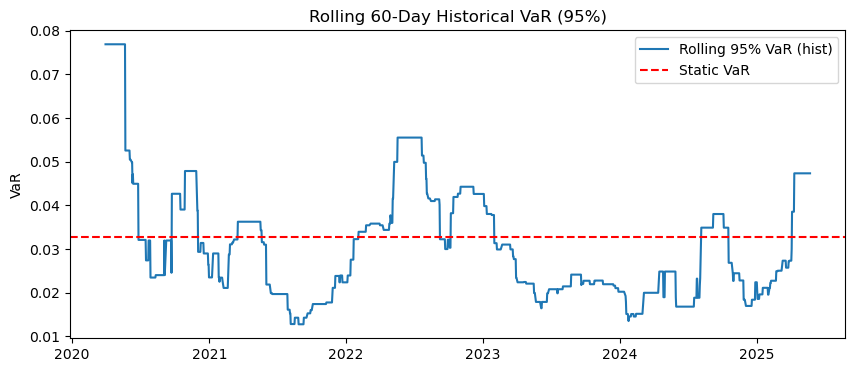

In [30]:
window = 60
roll_var = portR.rolling(window).quantile(0.05).dropna()
plt.figure(figsize=(10,4))
plt.plot(-roll_var, label='Rolling 95% VaR (hist)')
plt.axhline(VAR_norm, color='red', linestyle='--', label='Static VaR')
plt.title('Rolling 60-Day Historical VaR (95%)')
plt.ylabel('VaR')
plt.legend()
plt.show()

### Jarque bara test

In [31]:

jb_stat, jb_p = stats.jarque_bera(portR)
print(f"JB statistic = {jb_stat:.2f}, p-value = {jb_p:.3f}")
if jb_p < 0.05:
    print("Reject normality at 5% level.")
else:
    print("Cannot reject normality.")

JB statistic = 979.70, p-value = 0.000
Reject normality at 5% level.


# ASSIGNMENT TASK GIVEN IN CLASSROOM

Question: Given a portfolio’s VaR at 95% confidence is 10,000, compute the Expected Shortfall (ES) if the tail loss distribution follows a normal distribution.

Question: A portfolio has an expected annual return of 12%, a risk-free rate of 2%, and a standard deviation of 18%. Compute the Sharpe Ratio.

Question: Given mean return = 7%, volatility = 12%, and time horizon = 1 year, simulate one possible future portfolio return using a Monte Carlo model.



## 1.Question: Given a portfolio’s VaR at 95% confidence is 10,000, compute the Expected Shortfall (ES) if the tail loss distribution follows a normal distribution.





In [44]:
import scipy.stats as stats

def compute_expected_shortfall(var, confidence_level):
    z = stats.norm.ppf(confidence_level)
    sigma = var / z
    es = (stats.norm.pdf(z) / (1 - confidence_level)) * sigma
    return es

var_95 = 10000
confidence = 0.95
es_95 = compute_expected_shortfall(var_95, confidence)
print(f"Expected Shortfall at 95%: {es_95:.2f}")


Expected Shortfall at 95%: 12540.40


## 2.Question: A portfolio has an expected annual return of 12%, a risk-free rate of 2%, and a standard deviation of 18%. Compute the Sharpe Ratio.


In [45]:

# Given values for the second question
expected_return = 0.12  
risk_free_rate = 0.02   
std_dev = 0.18          

# Compute the Sharpe Ratio
sharpe_ratio = (expected_return - risk_free_rate) / std_dev

print("\nGiven values for Sharpe Ratio calculation:")
print(f"  Expected Annual Return: {expected_return:.2%}")
print(f"  Risk-Free Rate: {risk_free_rate:.2%}")
print(f"  Standard Deviation: {std_dev:.2%}")
print(f"Computed Sharpe Ratio: {sharpe_ratio:.4f}")


Given values for Sharpe Ratio calculation:
  Expected Annual Return: 12.00%
  Risk-Free Rate: 2.00%
  Standard Deviation: 18.00%
Computed Sharpe Ratio: 0.5556


This code computes the Sharpe Ratio for a portfolio using the given expected annual return, risk-free rate, and standard deviation. The Sharpe Ratio measures risk-adjusted return, showing how much excess return is earned for each unit of risk taken.

## 3.Question: Given mean return = 7%, volatility = 12%, and time horizon = 1 year, simulate one possible future portfolio return using a Monte Carlo model.


In [ ]:
mu = 0.07  # Mean return
sigma = 0.12  # Volatility
t = 1  # Time horizon in years

log_mu = mu - 0.5 * sigma**2
z = np.random.standard_normal()
simulated_price_relative = np.exp(log_mu * t + sigma * np.sqrt(t) * z)
simulated_return = simulated_price_relative - 1

print("Monte Carlo Simulated Return")
print(f"  Mean Return: {mu:.2%}")
print(f"  Volatility: {sigma:.2%}")
print(f"  Time Horizon: {t} year")
print(f"  Simulated Z: {z:.4f}")
print(f"  Simulated Portfolio Return: {simulated_return:.4f} ({simulated_return:.2%})")


Q3: Monte Carlo Simulated Return
  Mean Return: 7.00%
  Volatility: 12.00%
  Time Horizon: 1 year
  Simulated Z: -1.9379
  Simulated Portfolio Return: -0.1561 (-15.61%)


Simulate one possible future portfolio return
For a single time period (like 1 year here), we can use a simple model
based on the log-normal distribution assumption, which is common for asset prices.
The future return can be modeled as R_t = exp(mu*t + sigma*sqrt(t)*Z) - 1
where:
mu is the annual mean log return (approximately mean_return - 0.5 * sigma^2 for small sigma)
sigma is the annual volatility
t is the time horizon in years
Z is a standard normal random variable (mean=0, std dev=1)

Calculate the mean of the log returns (log_mu)
A common approximation for daily/short period returns: E[ln(1+R)] approx E[R] - Var[R]/2
For annual returns: E[ln(1+R)] = mu * t
E[ln(1+R)] approx annual_mean - 0.5 * annual_variance